## Analyse model filter

In [1]:
import pandas as pd
from utils import *


precision_points = [1, 3, 6]
datasets = ['value', 'one_hot', 'binary', 'tenfold_binary']

df_original, df_altered = set_up_and_print_metrics(datasets[0], precision_points[0])

In [2]:
print(f'{datasets[0]} with {precision_points[0]} DP')

print_results_model(df_original, df_altered, 'n')
print_results_model(df_original, df_altered, 'unique')
print_results_model(df_original, df_altered, 'div')
print_results_model(df_original, df_altered, 'qed_mid')

value with 1 DP
For n column:
For original model: 190.00, 177.70
For altered model: 893.43, 667.32


For unique column:
For original model: 0.06, 0.06
For altered model: 0.30, 0.22


For div column:
For original model: 0.79, 0.06
For altered model: 0.64, 0.21


For qed_mid column:
For original model: 0.74, 0.08
For altered model: 0.66, 0.14




In [3]:
print(f'{datasets[0]} with {precision_points[0]} DP')

print_results_model_with_substance_analysis(df_original, df_altered, 'unique')
print_results_model_with_substance_analysis(df_original, df_altered, 'div')
print_results_model_with_substance_analysis(df_original, df_altered, 'qed_mid')

value with 1 DP
For unique column:
For original model:
Dexametasona: 0.07 +- 0.04%, mediana de 0.07
Testosterona: 0.05 +- 0.08%, mediana de 0.03
For altered model:
Dexametasona: 0.18 +- 0.15%, mediana de 0.19
Testosterona: 0.42 +- 0.22%, mediana de 0.32


For div column:
For original model:
Dexametasona: 0.77 +- 0.03%, mediana de 0.76
Testosterona: 0.81 +- 0.07%, mediana de 0.82
For altered model:
Dexametasona: 0.58 +- 0.27%, mediana de 0.71
Testosterona: 0.71 +- 0.11%, mediana de 0.76


For qed_mid column:
For original model:
Dexametasona: 0.77 +- 0.08%, mediana de 0.76
Testosterona: 0.71 +- 0.07%, mediana de 0.73
For altered model:
Dexametasona: 0.60 +- 0.18%, mediana de 0.68
Testosterona: 0.72 +- 0.05%, mediana de 0.73




In [4]:
print(f'{datasets[0]} with {precision_points[0]} DP')

print_maximum_value_to_each_substance(df_original, df_altered, datasets[0])

value with 1 DP
Embedding: value

Dexametasona without GED:
unique: 0.13
InDiv: 0.83
QED_medio: 0.87

Dexametasona with GED:
unique: 0.43
InDiv: 0.77
QED_medio: 0.76


Testosterona without GED:
unique: 0.22
InDiv: 0.92
QED_medio: 0.80


Testosterona with GED:
unique: 0.78
InDiv: 0.79
QED_medio: 0.78


------------------------------------------------



value with 1 DP


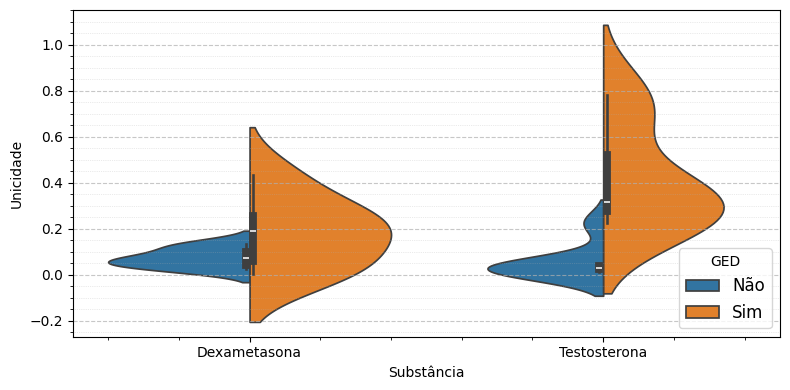

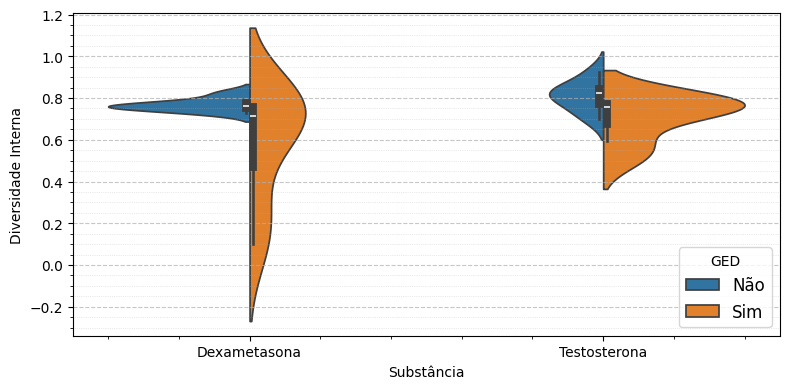

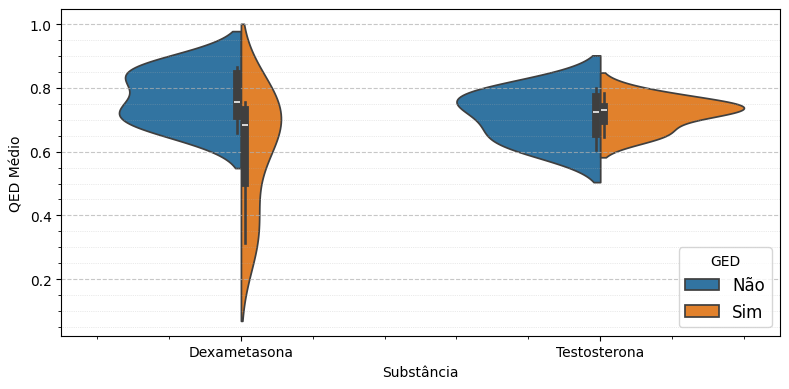

In [5]:
print(f'{datasets[0]} with {precision_points[0]} DP')
plot_info_model_filter_swapped(df_original, df_altered, 'dataset', 'unique', type='violine', legend_loc= 4, dodge_spacing=True, figsize=(8, 4))
plot_info_model_filter_swapped(df_original, df_altered, 'dataset', 'div', type='violine', legend_loc= 4, dodge_spacing=True, figsize=(8, 4))
plot_info_model_filter_swapped(df_original, df_altered, 'dataset', 'qed_mid', type='violine', legend_loc= 4, dodge_spacing=True, figsize=(8, 4))

## Unnused

Contains unnused plots and functins

In [50]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_info_model_filter_improved(dataset: str, column: str, plot_type='boxplot') -> None:
    """
    Creates a comparative plot (boxplot or violin plot) for a given column, grouped by substances and GED status.
    
    Parameters:
        dataset (str): Name of the dataset.
        column (str): Column to plot.
        plot_type (str): Type of plot, either 'boxplot' or 'violine'.
    
    Returns:
        None: Displays the plot.
    """
    # Add 'GED' column to differentiate original and altered datasets
    df_original['GED'] = 'Não'
    df_altered['GED'] = 'Sim'

    # Combine and label subsets
    substances = ['dexamethasone', 'testosterone']
    df_final = pd.concat([
        pd.concat([df_original[df_original['substance'] == sub], 
                   df_altered[df_altered['substance'] == sub]]).assign(Subset=sub)
        for sub in substances
    ])

    # Create the FacetGrid
    g = sns.FacetGrid(df_final, col="Subset", sharey=True, height=4, aspect=1.2, despine=False)
    if plot_type == 'violine':
        g.map(sns.violinplot, "GED", column, palette="Set2", linewidth=1)
    elif plot_type == 'boxplot':
        g.map(sns.boxplot, "GED", column, palette="Set2", linewidth=1, width=0.6)

    # Customize the titles and labels
    g.set_titles("{col_name}", size=14)
    g.set_axis_labels("GED", column.title(), fontsize=12)
    g.set_xticklabels(["Não", "Sim"], size=11)
    
    # Add a custom title for the entire plot
    plt.subplots_adjust(top=0.85)
    g.fig.suptitle(f"{dataset.title()}: Distribution of {column.title()} by Substances and GED Status",
                   fontsize=16, weight='bold')
    
    # Final layout adjustments
    g.set(ylim=(0, df_final[column].max() * 1.1))  # Add padding to y-axis
    # g.fig.tight_layout(w_pad=1)  # Add space between plots
    sns.despine(trim=True)  # Remove excess spines for cleaner look
    
    # Show the plot
    plt.show()


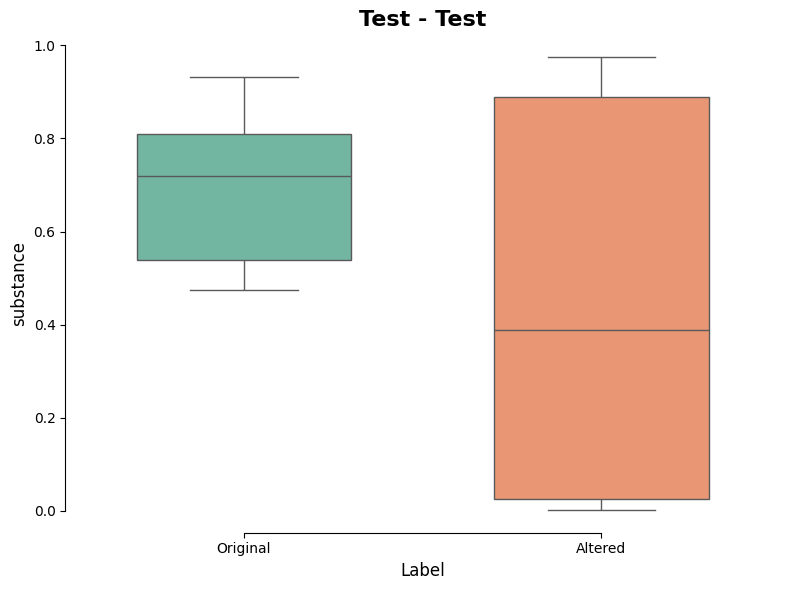

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_r_style_boxplot_combined(df_original, df_altered, column, dataset, title, x_label, y_label):
    """
    Creates a boxplot styled similarly to ggplot2 in R using data from `df_original` and `df_altered`.

    Parameters:
        df_original (pd.DataFrame): Original dataset.
        df_altered (pd.DataFrame): Altered dataset.
        column (str): The numeric column to plot (e.g., "F1").
        dataset (str): Name of the dataset (e.g., "Test").
        title (str): The title of the plot.
        x_label (str): Label for the x-axis.
        y_label (str): Label for the y-axis.

    Returns:
        None: Displays the plot.
    """
    # Add a label to distinguish between the two datasets
    df_original['Label'] = 'Original'
    df_altered['Label'] = 'Altered'

    # Combine the two DataFrames
    df_combined = pd.concat([df_original, df_altered])

    # Create the plot
    plt.figure(figsize=(8, 6))  # Set the figure size
    sns.boxplot(data=df_combined, x='Label', y=column, palette="Set2", width=0.6)

    # Add plot titles and labels
    plt.title(f"{title} - {dataset.title()}", fontsize=16, weight='bold')
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)

    # Remove gridlines for a clean look
    sns.despine(trim=True)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming `df_original` and `df_altered` are your DataFrames with a column "F1":
plot_r_style_boxplot_combined(df_original, df_altered, column="unique", dataset="Test", 
                              title="Test", x_label="Label", y_label="substance")


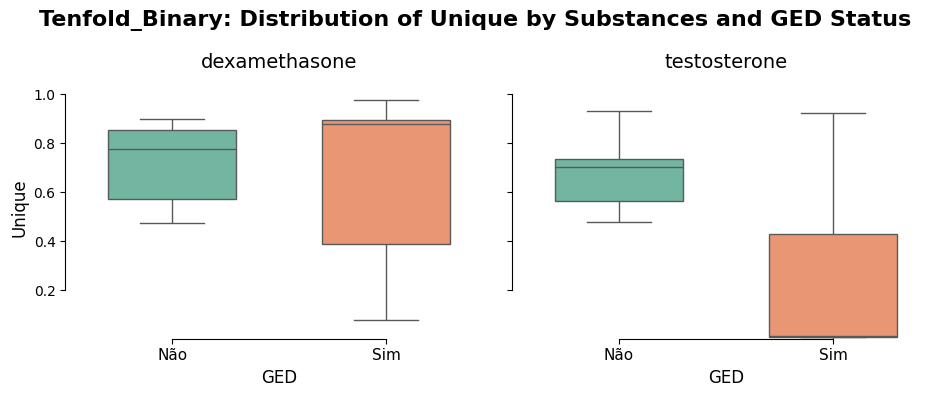

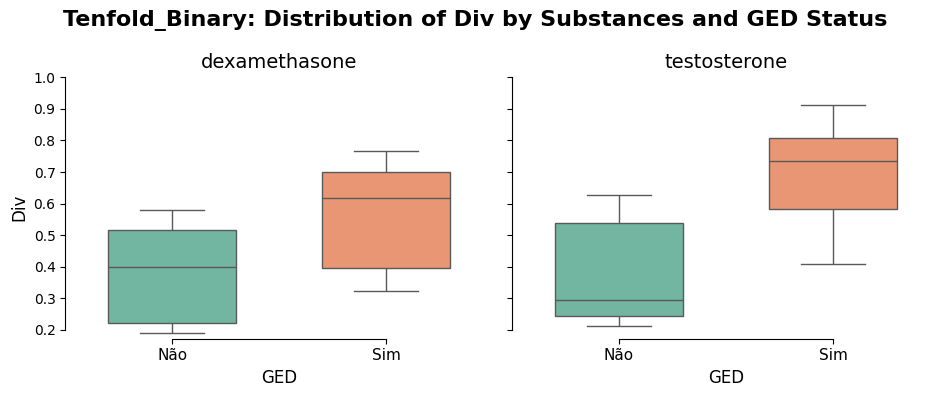

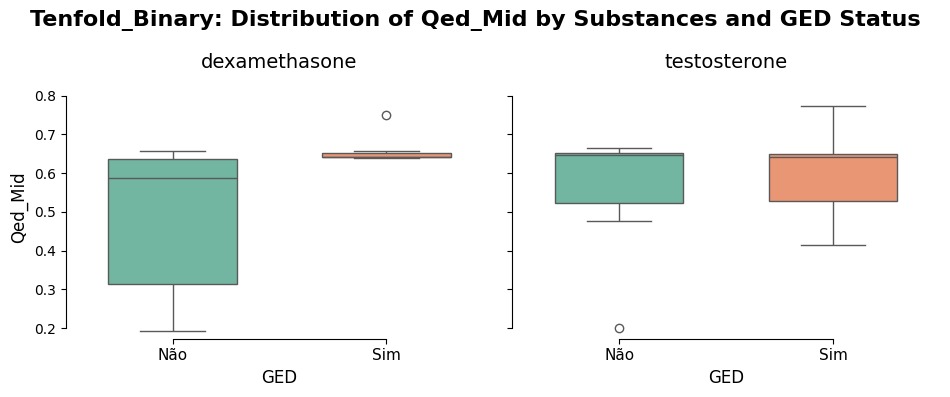

In [34]:
plot_info_model_filter_improved(dataset, "unique")
plot_info_model_filter_improved(dataset, 'div')
plot_info_model_filter_improved(dataset, "qed_mid")

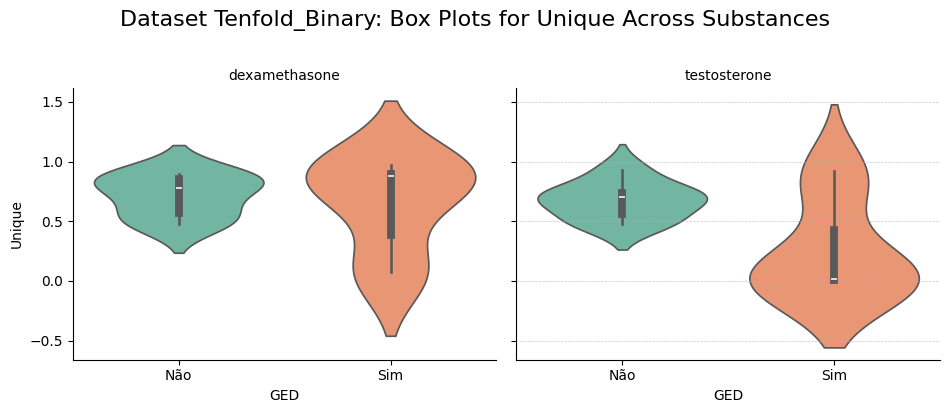

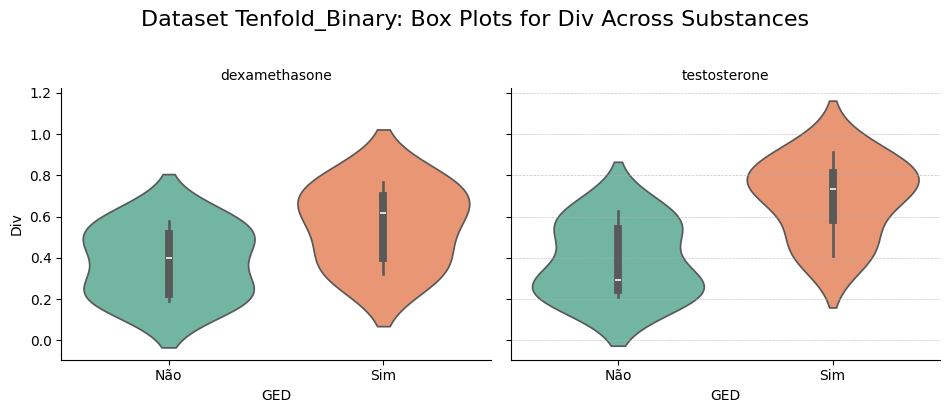

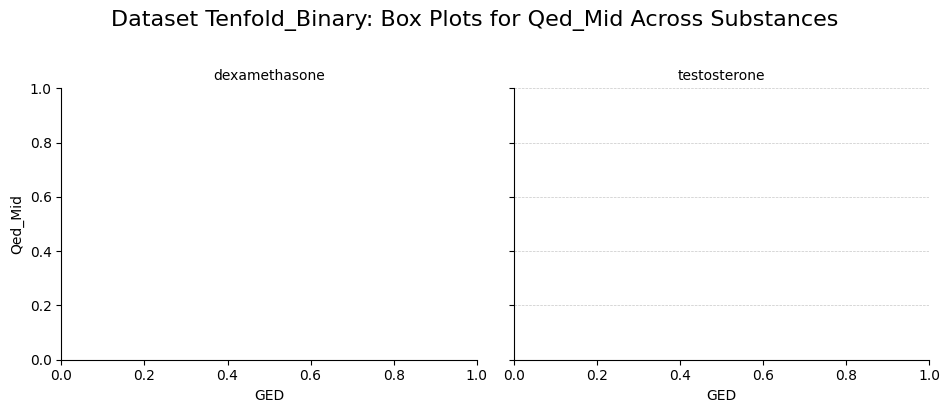

In [56]:
plot_info_model_filter(dataset, "unique", 'violine')
plot_info_model_filter(dataset, 'div', 'violine')
plot_info_model_filter(dataset, "qed_mid", 'voline')

In [31]:
def print_results(col: str):

    print(f'For {col} column:')
    print(f'For 6 decimal points: {df_precision_6[col].mean():.2f} +- {df_precision_6[col].std():.2f}')
    print(f'For 3 decimal points: {df_precision_3[col].mean():.2f} +- {df_precision_3[col].std():.2f}')
    print(f'For 1 decimal points: {df_precision_1[col].mean():.2f} +- {df_precision_1[col].std():.2f}')
    print("\n")

print(f"Dataset {dataset}")

print_results('n')
print_results('unique')
print_results('div')
print_results('qed_mid')

Dataset one_hot
For n column:
For 6 decimal points: 1083.14 +- 608.13
For 3 decimal points: 3000.00 +- 0.00
For 1 decimal points: 518.07 +- 354.31


For unique column:
For 6 decimal points: 0.36 +- 0.20
For 3 decimal points: 1.00 +- 0.00
For 1 decimal points: 0.17 +- 0.12


For div column:
For 6 decimal points: 0.71 +- 0.17
For 3 decimal points: 0.35 +- 0.05
For 1 decimal points: 0.78 +- 0.02


For qed_mid column:
For 6 decimal points: 0.73 +- 0.07
For 3 decimal points: 0.42 +- 0.03
For 1 decimal points: 0.80 +- 0.04




In [32]:
def plot_info_decimal_points(dataset:str, column: str, type: str='boxplot') -> None:
    df_precision_6['Group'] = 'pts_6'
    df_precision_3['Group'] = 'pts_3'
    df_precision_1['Group'] = 'pts_1'

    df_combined = pd.concat([df_precision_1[df_precision_1['substance'] == 'dexamethasone'], 
                             df_precision_3[df_precision_3['substance'] == 'dexamethasone'],
                             df_precision_6[df_precision_6['substance'] == 'dexamethasone']])
    df_combined['Subset'] = 'dexamethasone'

    df_combined_2= pd.concat([df_precision_1[df_precision_1['substance'] == 'testosterone'], 
                             df_precision_3[df_precision_3['substance'] == 'testosterone'],
                             df_precision_6[df_precision_6['substance'] == 'testosterone']])
    df_combined_2['Subset'] = 'testosterone'

    df_final = pd.concat([df_combined, df_combined_2])

    g = sns.FacetGrid(df_final, col="Subset", sharey=True, height=4, aspect=1.2)
    if (type == 'violine'):
        g.map(sns.violinplot, "Group", column, palette="Set2")
    elif (type == 'boxplot'):
        g.map(sns.boxplot, "Group", column, palette="Set2")

    g.set_titles("{col_name}")
    g.set_axis_labels("Group", column.title())
    
    plt.suptitle(f"{dataset}: Box Plots for {column.title()} Across Substances", y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()


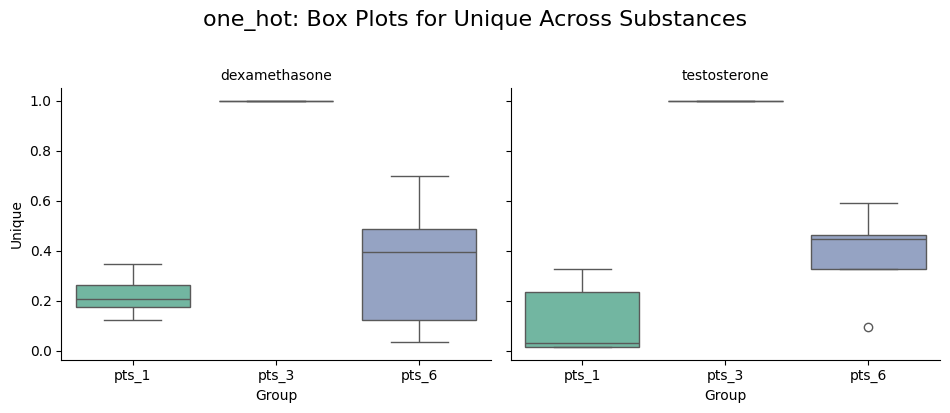

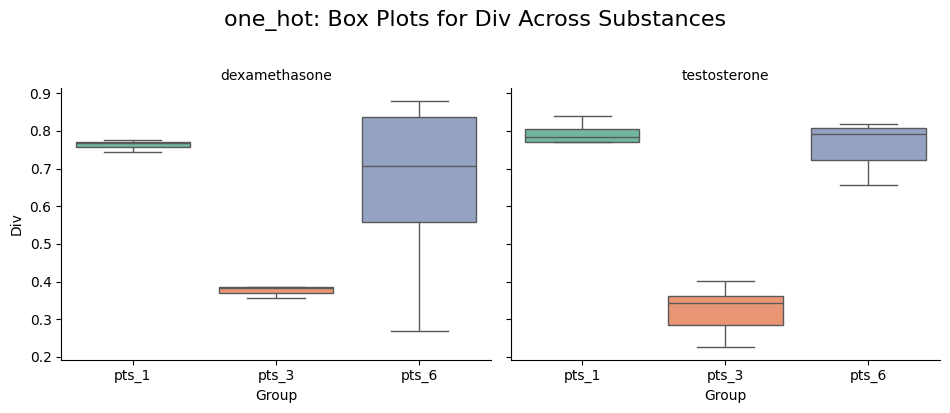

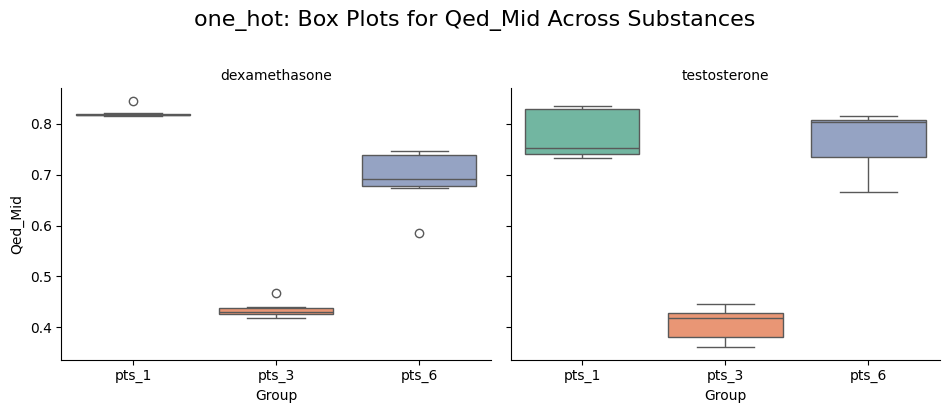

In [11]:
plot_info_decimal_points(dataset, "unique")
plot_info_decimal_points(dataset, 'div')
plot_info_decimal_points(dataset, "qed_mid")

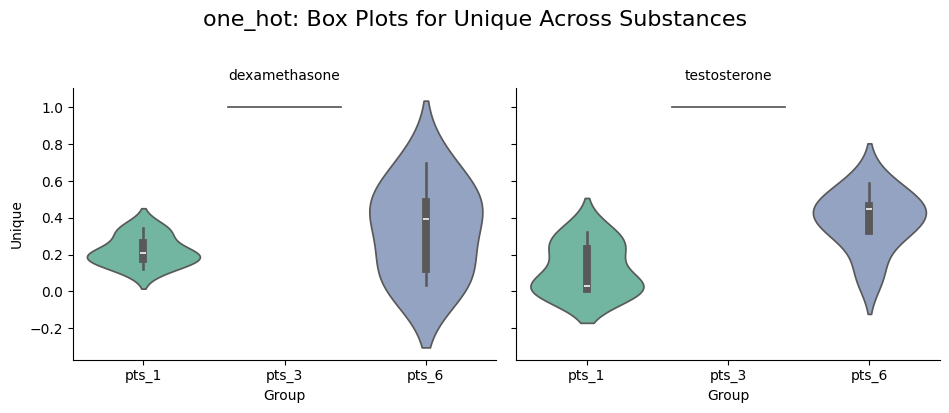

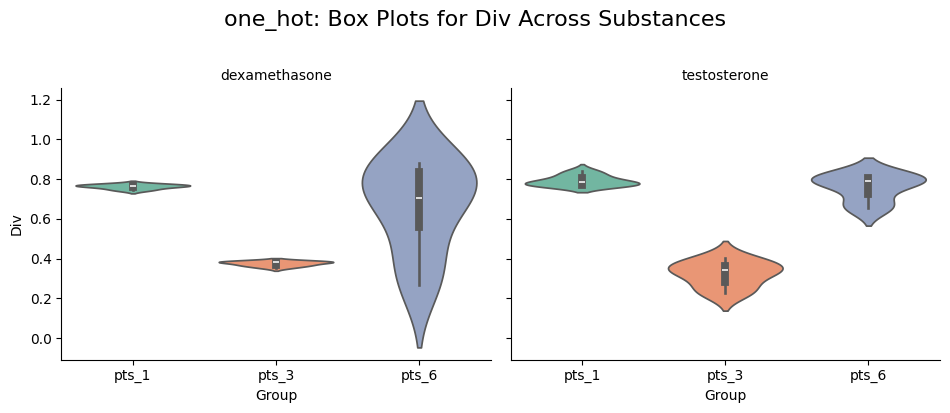

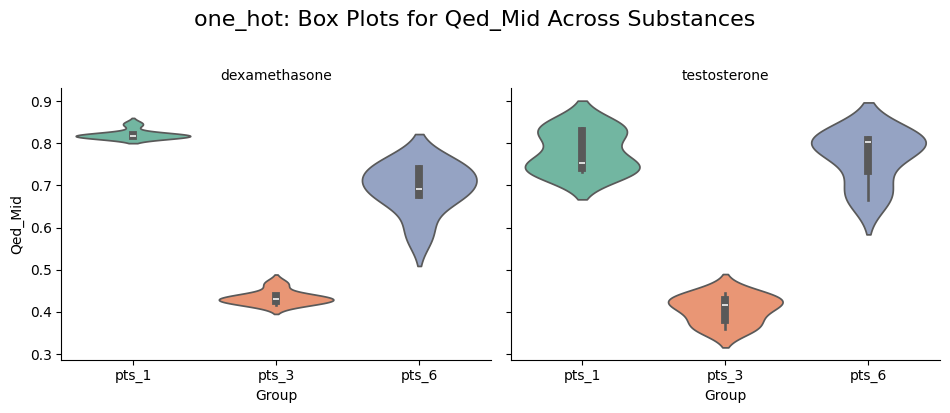

In [12]:
plot_info_decimal_points(dataset, "unique", 'violine')
plot_info_decimal_points(dataset, 'div', 'violine')
plot_info_decimal_points(dataset, "qed_mid", 'violine')